In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import utils as ut

## Single scenario with realistic parameters

In [8]:
# Sampling taus from lognormal with default parameters
logmean, logstd, n_samples = -4, 2.5, 100
taus = ut.sample_taus_lognorm(logmean, logstd, n_samples)

# Defining the default realistic paramters
pars = ut.TT_params(taus)

# Initial conditions of mean field T, P and S 
init_vars = [np.ones(len(taus)), pars.P0, np.zeros(len(taus))]

# Dot equations for T, P and S
dot_eqs = [ut.Ts_dot, ut.P_dot, ut.Ss_dot]

# Integration paraemters
t_steps, dt, traj_steps = 10000, 0.004, 30

In [9]:
# Integrating the trajectories
trajs = ut.nsolve(init_vars, dot_eqs, pars, t_steps, dt, traj_steps)

# Defining useful variables
T_trajs = np.array([tr[0] for tr in trajs])
tot_T = np.sum(T_trajs, axis=1)
P_trajs = np.array([tr[1] for tr in trajs])
S_trajs = np.array([tr[2] for tr in trajs])
times = np.linspace(0, t_steps * dt, len(T_trajs[:,0]))

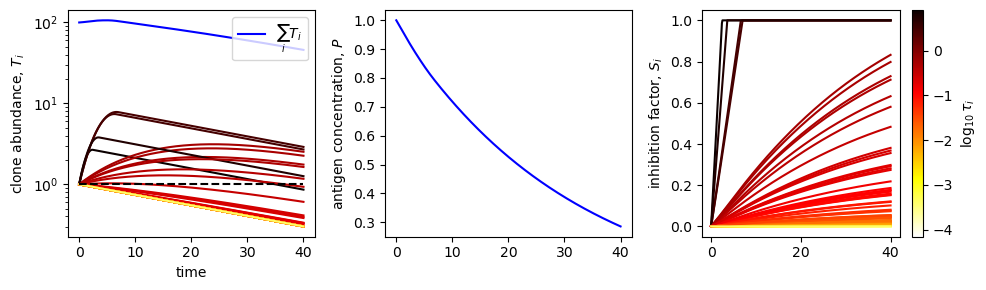

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,3))

ax1.set_yscale('log')
ax1.set_xlabel('time')
ax1.set_ylabel(r'clone abundance, $T_i$')
#ax1.set_ylim(0.8, max(tot_T)*1.5)

cmap = colormaps.get_cmap('hot_r')
cmap_norm = plt.Normalize(vmin=min(np.log10(taus)), vmax=max(np.log10(taus)))
for i, Ts in enumerate(T_trajs.T):
    color = cmap(cmap_norm(np.log10(taus[i])))
    ax1.plot(times, Ts, c=color)
    
#ax1.plot(times, T_trajs.T[0], c='b', alpha=0.5, label=r'$T_i$')
ax1.plot(times, tot_T, c='b', label=r'$\sum_i T_i$')
ax1.plot(times, np.ones(len(times)), c='k', ls='--')
ax1.legend()

ax2.set_ylabel(r'antigen concentration, $P$')
ax2.plot(times, P_trajs, c='b')

ax3.set_ylabel(r'inhibition factor, $S_i$')
for i, Ss in enumerate(S_trajs.T):
    color = cmap(cmap_norm(np.log10(taus[i])))
    ax3.plot(times, Ss, c=color)
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=cmap_norm)
sm.set_array([])
fig.colorbar(sm, ax=ax3, label=r'$\log_{10} \tau_i$')

plt.tight_layout()

name = 'dyn_realistic'
plt.savefig('plots/'+name+'.svg', dpi=200, facecolor='w')

pars.print_on_file('plots/', name+'_pars', {'logmean':logmean, 'logstd':logstd, 'n_samples':n_samples})

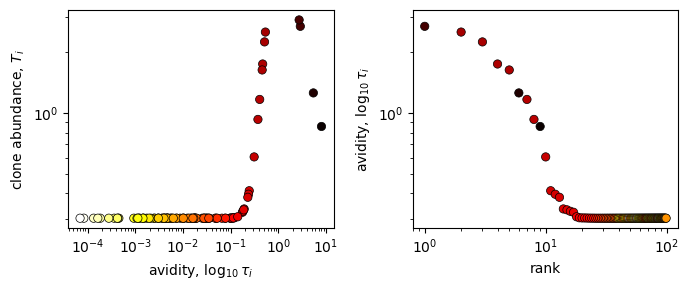

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,3))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'avidity, $\log_{10} \tau_i$')
ax1.set_ylabel(r'clone abundance, $T_i$')
ax1.scatter(taus, T_trajs[-1], c=np.log10(taus), cmap=cmap, edgecolor='black', linewidth=0.5)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel(r'avidity, $\log_{10} \tau_i$')
ax2.set_xlabel(r'rank')
sort_ids = np.argsort(T_trajs[-1])[::-1]
ranks = np.arange(len(T_trajs[-1]))
ax2.scatter(ranks, T_trajs[-1][sort_ids], c=np.log10(taus)[sort_ids], cmap=cmap, edgecolor='black', linewidth=0.5)

plt.tight_layout()
plt.savefig('plots/'+name+'_ab_stats.svg', dpi=200, facecolor='w')